In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import re
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
df = pd.read_excel("../3차결과.xlsx") 
df = df.drop(["코드", "prediction"], axis=1)

df

,학생명,제출 시간,문제 이름,정답 여부,오류 분류,대분류
0,강지민,22.11.01 22:08,10보다작을까?-1,AC,NaN,NaN
1,권현욱,21.12.26 10:24,10보다작을까?-1,AC,NaN,NaN
2,김강범,22.07.30 18:11,10보다작을까?-1,AC,NaN,NaN
3,김동우,22.11.05 10:41,10보다작을까?-1,AC,NaN,NaN
4,김민하,21.12.18 11:24,10보다작을까?-1,AC,NaN,NaN
...,...,...,...,...,...,...
1466,허윤구,21.03.07 11:11,사칙연산,WA,-1,misunderstanding
1467,허윤구,21.03.07 11:10,사칙연산,WA,-1,misunderstanding
1468,허윤구,21.03.07 11:07,사칙연산,WA,0,Output format mismatch
1469,허윤구,21.03.07 11:07,사칙연산,WA,2,Output format mismatch


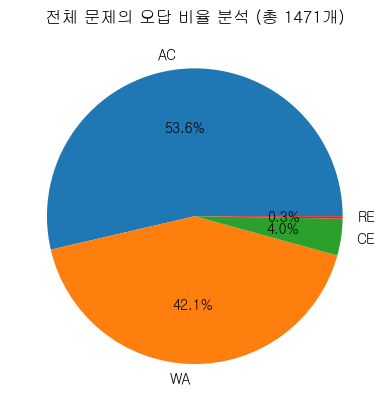

In [3]:
value_counts = df['정답 여부'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%')
plt.title(f"전체 문제의 오답 비율 분석 (총 {len(df)}개)")
plt.show()

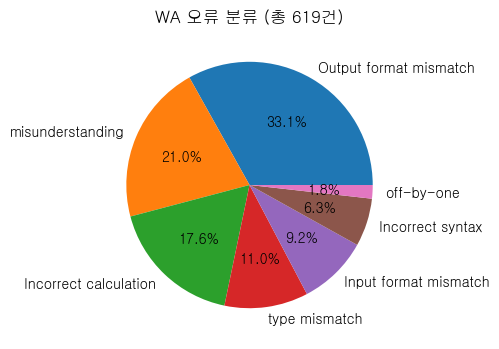

In [4]:
wa = df[df['정답 여부'] == 'WA']

sorted_count = wa['대분류'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(sorted_count, labels=sorted_count.index, autopct='%1.1f%%')
plt.title(f"WA 오류 분류 (총 {len(wa)}건)")
plt.show()

In [5]:
df2 = pd.read_excel("../문제별정답코드.xlsx") 

df2 = df2.drop(["정답 코드"], axis=1)

df2

,문제 이름,multiple input,multiple output,conditional statement,mathematical calculation
0,10보다작을까?-1,0,0,1,0
1,10보다작을까?-2,0,0,1,0
2,내나이가어때서,1,0,0,1
3,두수비교하기(<=),1,0,1,0
4,두수비교하기(==),1,0,1,0
5,두정수바꾸어출력하기,1,1,0,0
6,두정수입력받기,1,1,0,0
7,반값이벤트,1,0,0,1
8,사칙연산,1,1,0,1
9,시간단위로변환하기,0,0,0,1


In [6]:
result = pd.merge(df, df2, on='문제 이름')

result

,학생명,제출 시간,문제 이름,정답 여부,오류 분류,대분류,multiple input,multiple output,conditional statement,mathematical calculation
0,강지민,22.11.01 22:08,10보다작을까?-1,AC,NaN,NaN,0,0,1,0
1,권현욱,21.12.26 10:24,10보다작을까?-1,AC,NaN,NaN,0,0,1,0
2,김강범,22.07.30 18:11,10보다작을까?-1,AC,NaN,NaN,0,0,1,0
3,김동우,22.11.05 10:41,10보다작을까?-1,AC,NaN,NaN,0,0,1,0
4,김민하,21.12.18 11:24,10보다작을까?-1,AC,NaN,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1466,허윤구,21.03.07 11:11,사칙연산,WA,-1,misunderstanding,1,1,0,1
1467,허윤구,21.03.07 11:10,사칙연산,WA,-1,misunderstanding,1,1,0,1
1468,허윤구,21.03.07 11:07,사칙연산,WA,0,Output format mismatch,1,1,0,1
1469,허윤구,21.03.07 11:07,사칙연산,WA,2,Output format mismatch,1,1,0,1


In [7]:
def plot_pie(df, question, ax):
    wa = df[(df['정답 여부'] == 'WA') & (df[question] == 1)]
    total_df = len(df[(df[question] == 1)])
    total_wa = len(wa)
    sorted_count = wa['대분류'].value_counts()

    ax.pie(sorted_count, labels=sorted_count.index, autopct='%1.1f%%')
    ax.set_title(f"{question} (wa개수 {total_wa}) (wa 비율 {total_wa/total_df:.2f})")

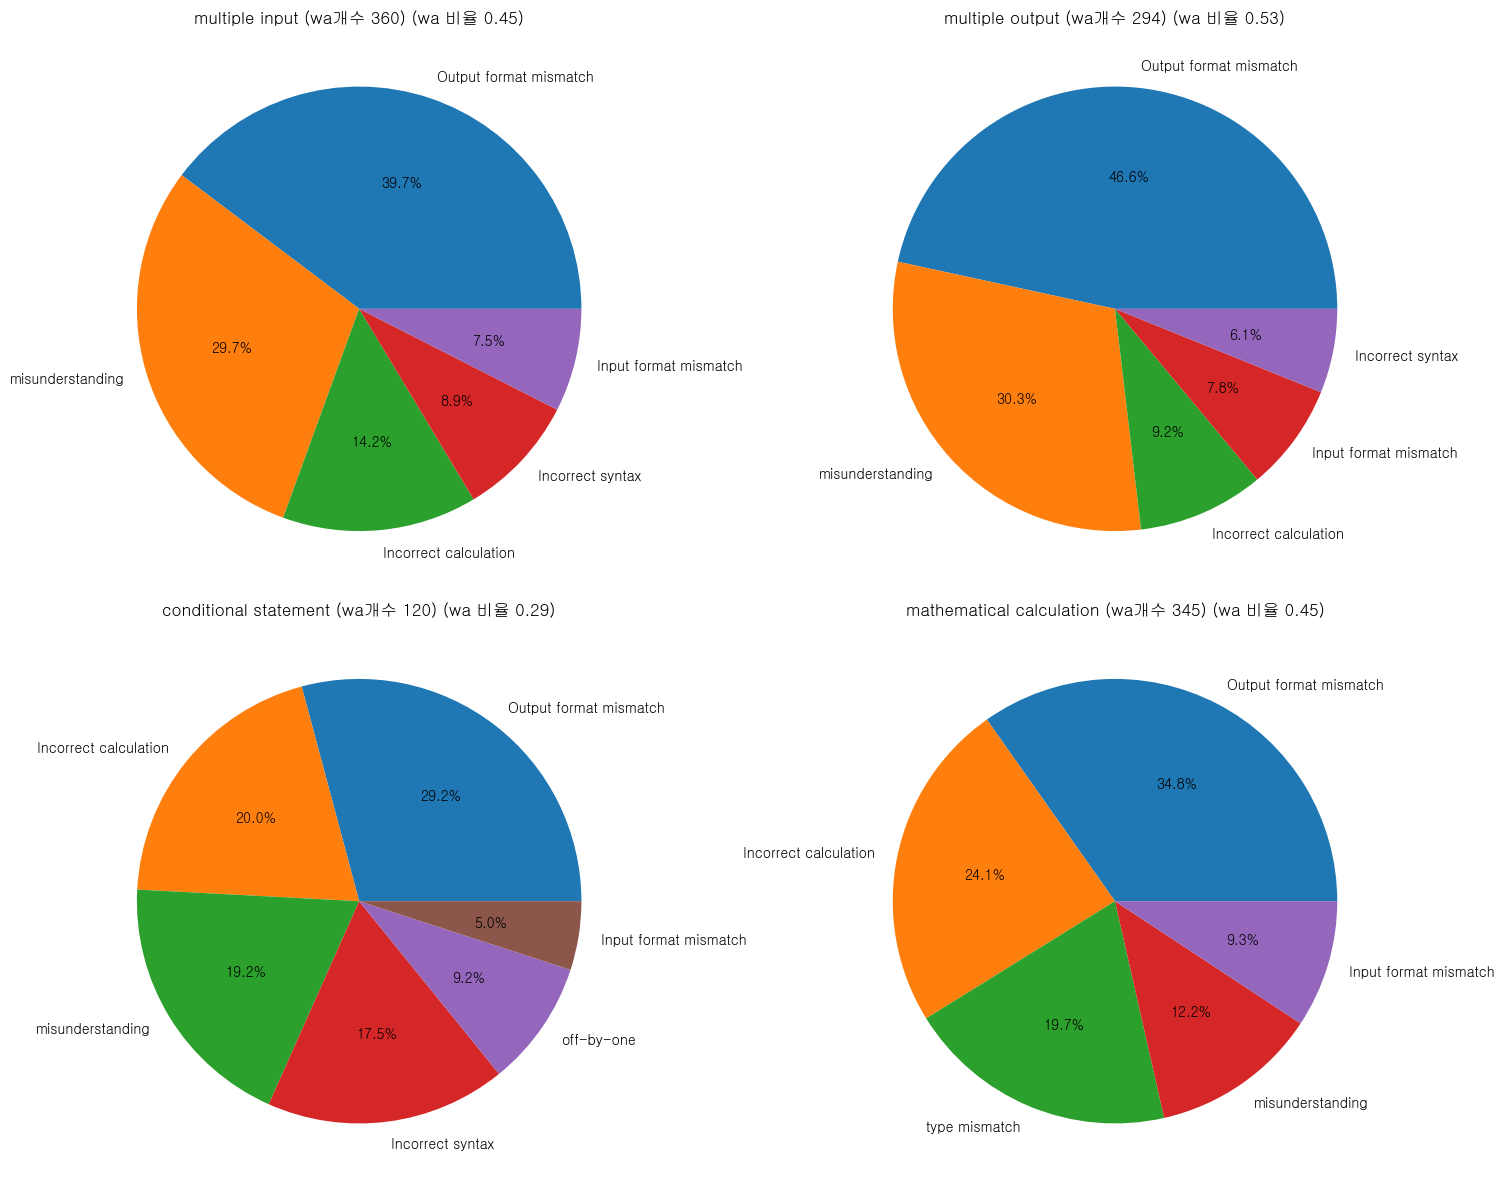

In [8]:
questions = ["multiple input", "multiple output", "conditional statement", "mathematical calculation"]
num_questions = len(questions)

num_rows = np.ceil(num_questions / 2)
num_cols = min(num_questions, 2)

fig, axes = plt.subplots(nrows=int(num_rows), ncols=int(num_cols), figsize=(15, 12))

for idx, question in enumerate(questions):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

    plot_pie(result, question, ax)

plt.tight_layout()
plt.show()

In [9]:
df3 = pd.read_excel("../학생들의그룹정보.xlsx") 

df3 = df3.drop(["정답률"], axis=1)

df3.head()

,학생명,그룹
0,강석준,group2
1,강수인,group1
2,강지민,group1
3,권현욱,group1
4,김가영,group2


In [10]:
result2 = pd.merge(df, df3, on='학생명')

result2

,학생명,제출 시간,문제 이름,정답 여부,오류 분류,대분류,그룹
0,강지민,22.11.01 22:08,10보다작을까?-1,AC,NaN,NaN,group1
1,강지민,22.11.01 22:12,10보다작을까?-2,AC,NaN,NaN,group1
2,강지민,22.10.29 10:51,내나이가어때서,AC,NaN,NaN,group1
3,강지민,22.11.05 10:38,두수비교하기(<=),AC,NaN,NaN,group1
4,강지민,22.11.01 21:55,두수비교하기(==),AC,NaN,NaN,group1
...,...,...,...,...,...,...,...
1466,한재우,22.12.04 11:55,반값이벤트,AC,NaN,NaN,group3
1467,한재우,22.12.04 11:48,사칙연산,WA,0,Output format mismatch,group3
1468,한재우,22.12.04 11:48,사칙연산,WA,2,Output format mismatch,group3
1469,한재우,22.12.04 11:53,사칙연산,WA,NaN,misunderstanding,group3


In [11]:
def plot_pie2(df, group, ax):
    wa = df[(df['정답 여부'] == 'WA') & (df["그룹"] == group)]
    total_df = len(df[(df["그룹"] == group)])
    total_wa = len(wa)
    sorted_count = wa['대분류'].value_counts()

    ax.pie(sorted_count, labels=sorted_count.index, autopct='%1.1f%%')
    ax.set_title(f"{group} (wa개수 {total_wa}) (wa 비율 {total_wa/total_df:.2f})")

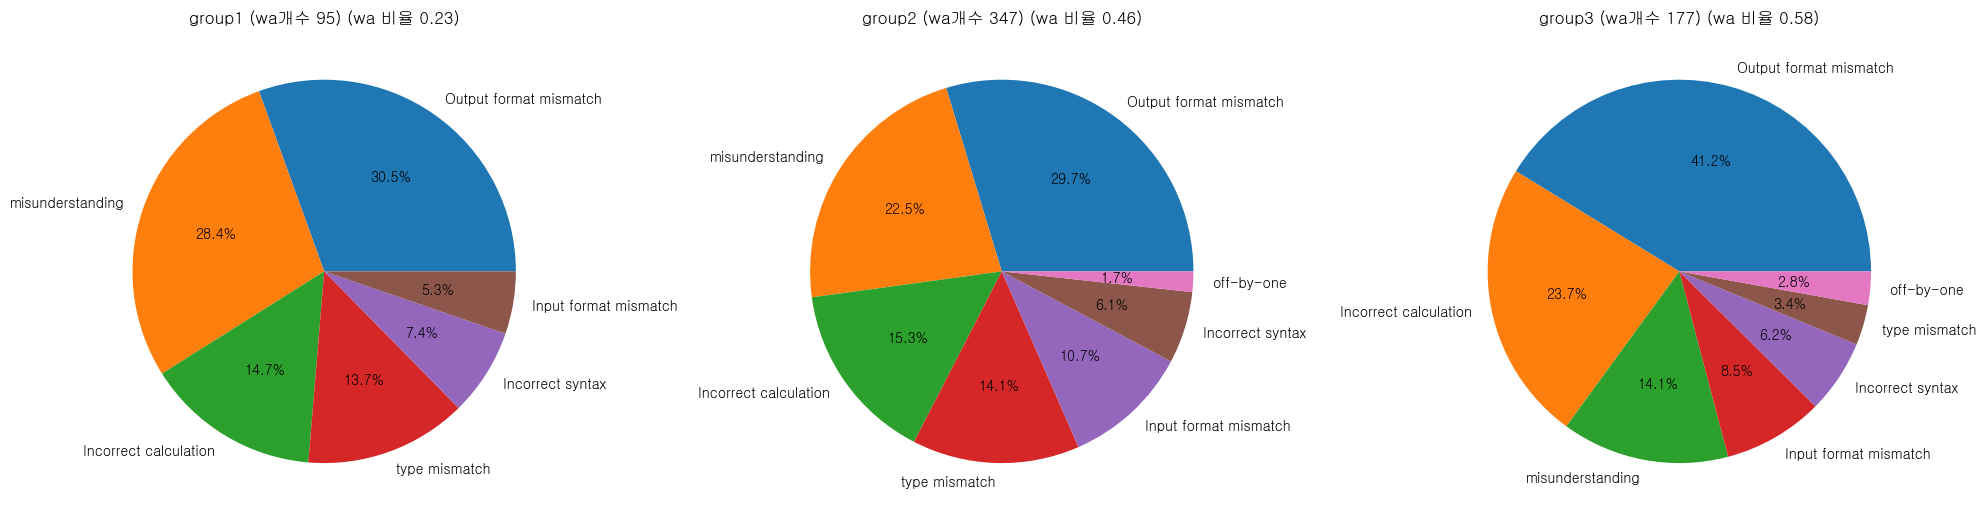

In [12]:
groups = result2["그룹"].unique()

fig, axes = plt.subplots(1,3, figsize=(20, 20))

for idx, group in enumerate(groups):
    ax = axes[idx]
    plot_pie2(result2, group, ax)

plt.tight_layout()
plt.show()

3 2 2


IndexError: index 2 is out of bounds for axis 0 with size 2

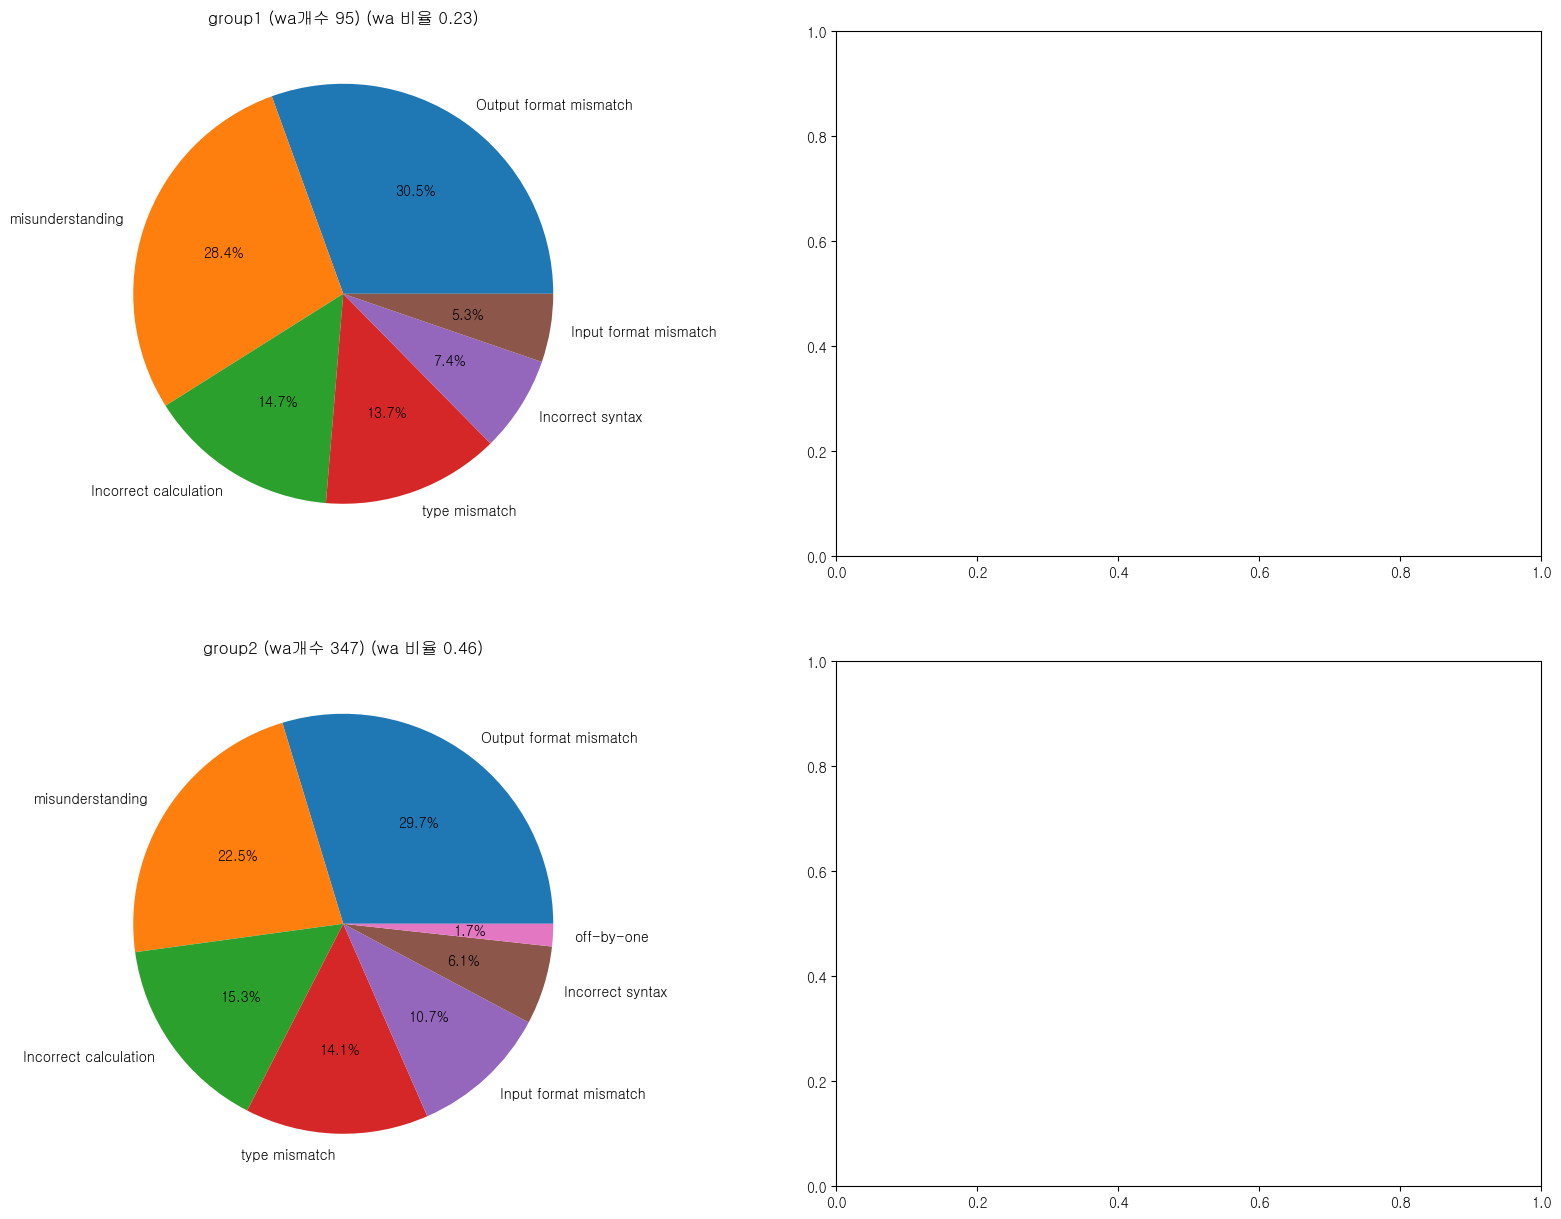

In [13]:
groups = result2["그룹"].unique()

num_groups = len(groups)

num_rows = np.ceil(num_groups / 2)
num_cols = min(num_groups, 1)

fig, axes = plt.subplots(nrows=int(num_rows), ncols=int(num_rows), figsize=(20, 15))

print(num_groups,int(num_rows), int(num_rows))

for idx, group in enumerate(groups):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

    plot_pie2(result2, group, ax)

plt.tight_layout()
plt.show()

In [ ]:
result3 = pd.merge(result2, df2, on='문제 이름')

result3

,학생명,제출 시간,문제 이름,정답 여부,오류 분류,대분류,일자,그룹,multiple input,multiple output,conditional statement,mathematical calculation
0,송지원,20.05.16,두정수입력받기,WA,1,output format mismatch,1,group1,1,1,0,0
1,송지원,20.05.18,두정수입력받기,AC,NaN,NOT,2,group1,1,1,0,0
2,이연준,20.10.25,두정수입력받기,WA,5,input format mismatch,1,group2,1,1,0,0
3,이연준,20.10.25,두정수입력받기,WA,5,input format mismatch,1,group2,1,1,0,0
4,이연준,20.10.25,두정수입력받기,AC,NaN,NOT,1,group2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,김동우,22.11.05,10보다작을까?-1,AC,NaN,NOT,3,group2,0,0,1,0
1467,박유빈,22.12.10,10보다작을까?-1,AC,NaN,NOT,5,group3,0,0,1,0
1468,신예린,22.10.30,10보다작을까?-1,AC,NaN,NOT,4,group1,0,0,1,0
1469,신예린,22.11.05,10보다작을까?-1,AC,NaN,NOT,5,group1,0,0,1,0


In [ ]:
def plot_pie3(df, group, question , ax):
    wa = df[(df['정답 여부'] == 'WA') & (df["그룹"] == group) & (df[question] == 1)]
    total_df = len(df[(df["그룹"] == group) & (df[question] == 1) ])
    total_wa = len(wa)
    sorted_count = wa['대분류'].value_counts()

    ax.pie(sorted_count, labels=sorted_count.index, autopct='%1.1f%%')
    ax.set_title(f"{question}-{group} (wa개수 {total_wa}) (wa 비율 {total_wa/total_df:.2f})")

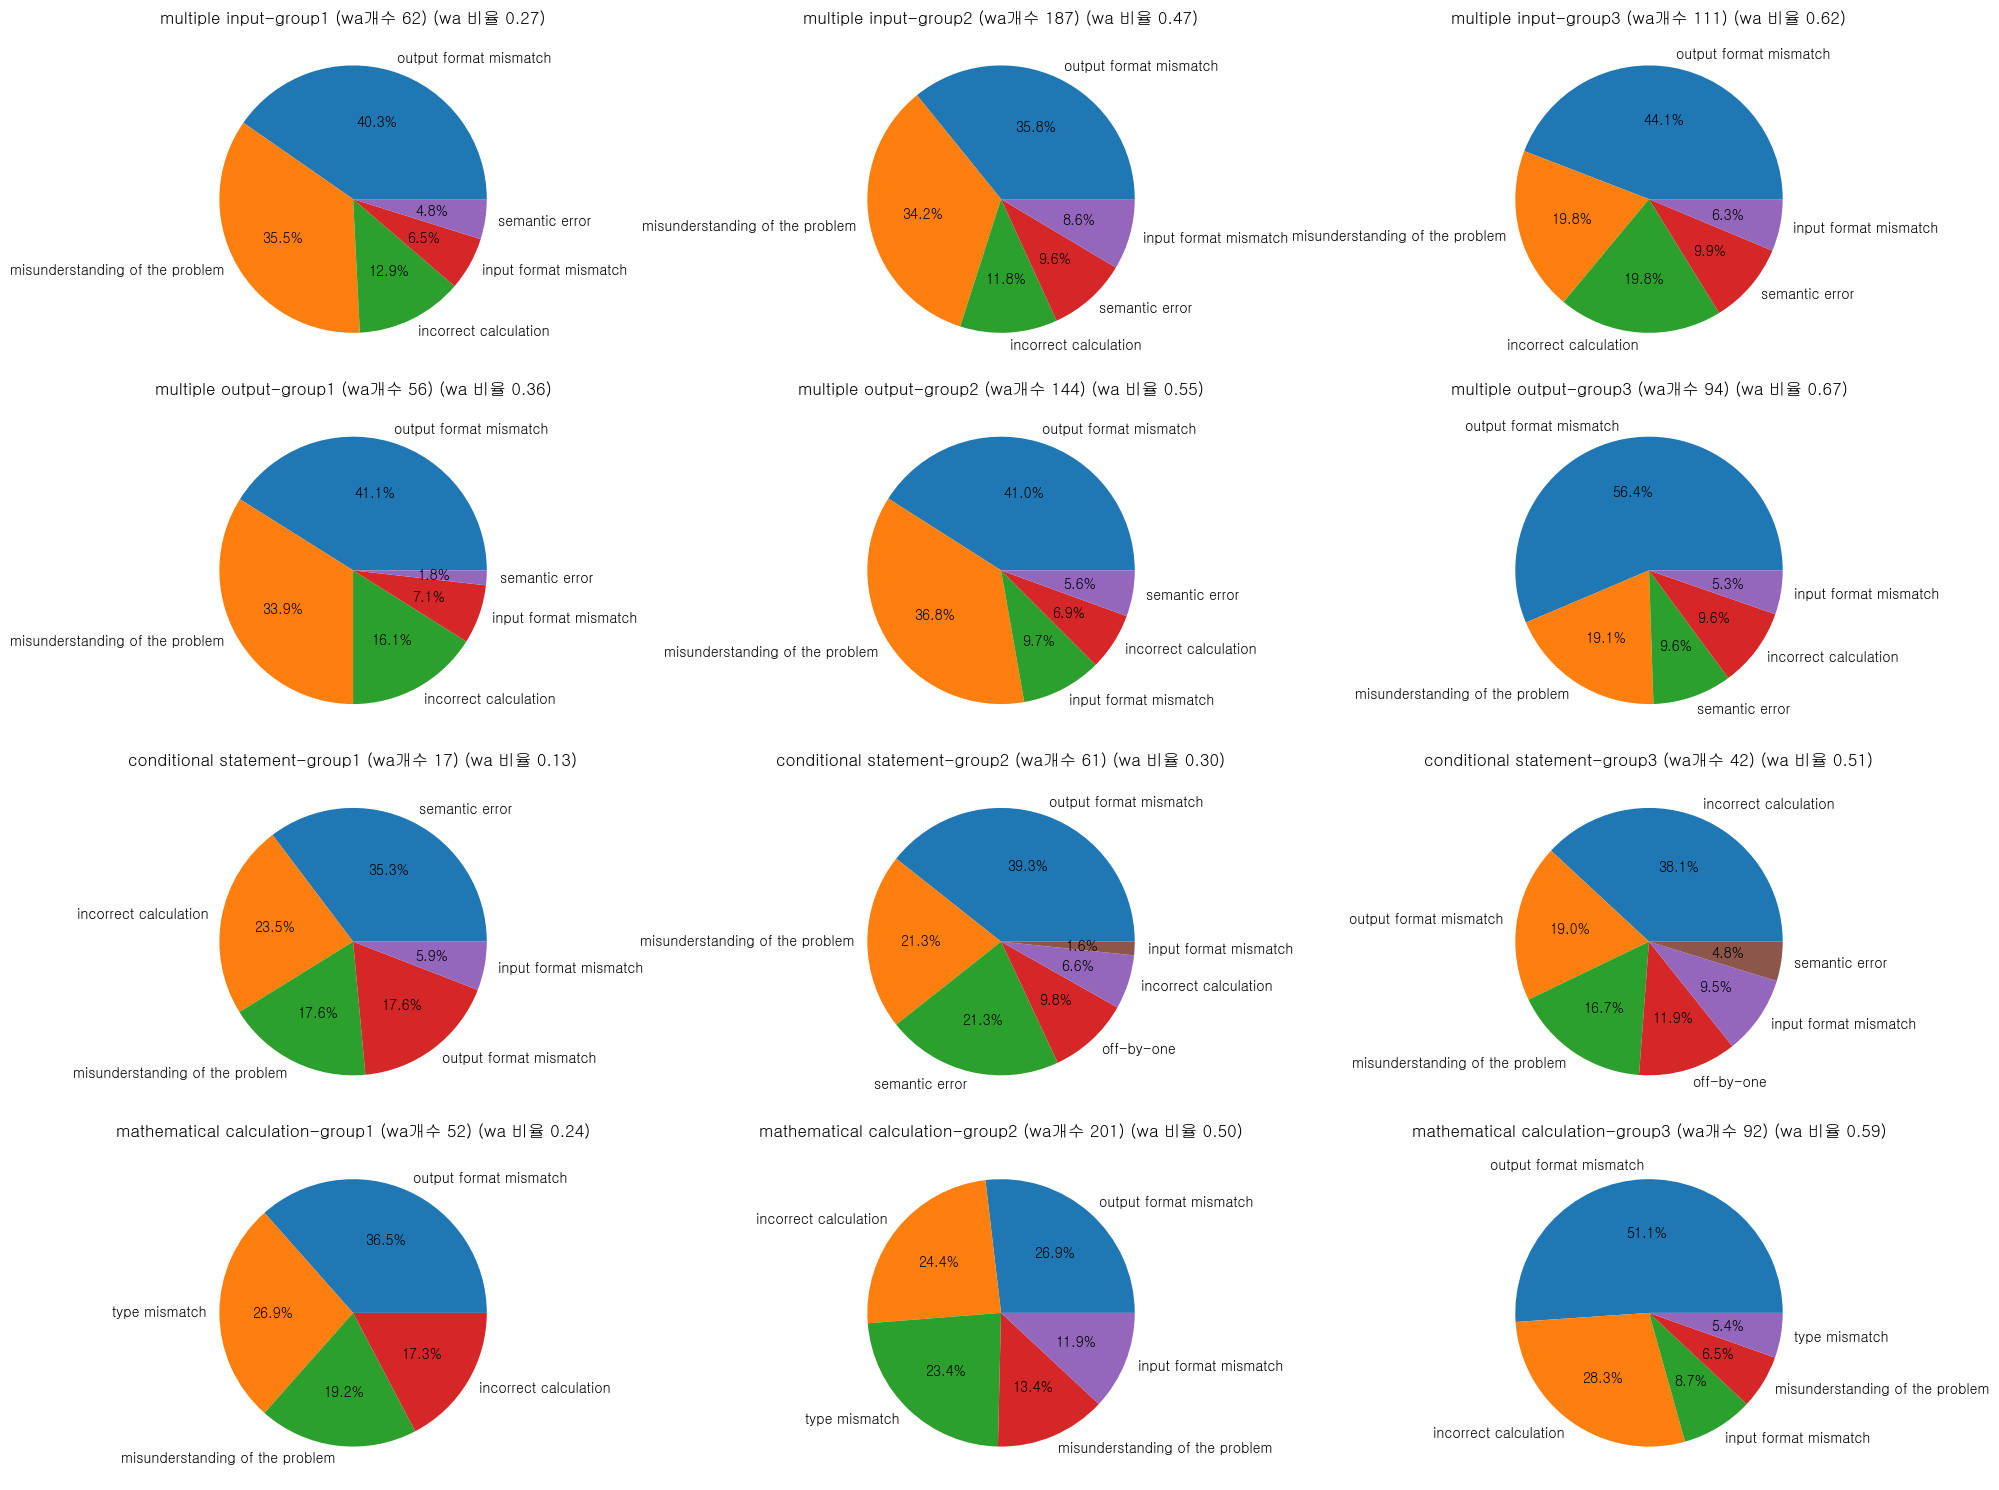

In [ ]:
groups = result2["그룹"].unique()
questions = ["multiple input", "multiple output", "conditional statement", "mathematical calculation"]

num_groups = len(groups) * len(questions)

num_rows = np.ceil(num_groups / 3)
num_cols = min(num_groups, 3)

fig, axes = plt.subplots(nrows=int(num_rows), ncols=int(num_cols), figsize=(20, 15))

idx = 0
for question in questions:
    for idx2, group in enumerate(groups):
        row_idx = (idx + idx2) // num_cols
        col_idx = (idx + idx2) % num_cols
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

        plot_pie3(result3, group, question, ax)
    idx += len(groups)
plt.tight_layout()
plt.show()